# IMPORTS

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans, DBSCAN
from matplotlib import pyplot as plt


# INFRAESTRUTURA

### Você está rodando em Python 3.9+

(-0.5, 879.5, 58.5, -0.5)

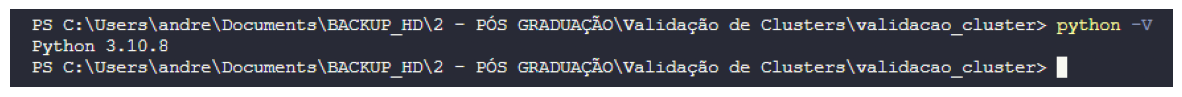

In [21]:
img = plt.imread('python_version.png', format='png')
fig, ax = plt.subplots(1,1,figsize=(15,5))
im = ax.imshow(img)
ax.axis('off')


### Você está usando um ambiente virtual

(-0.5, 912.5, 292.5, -0.5)

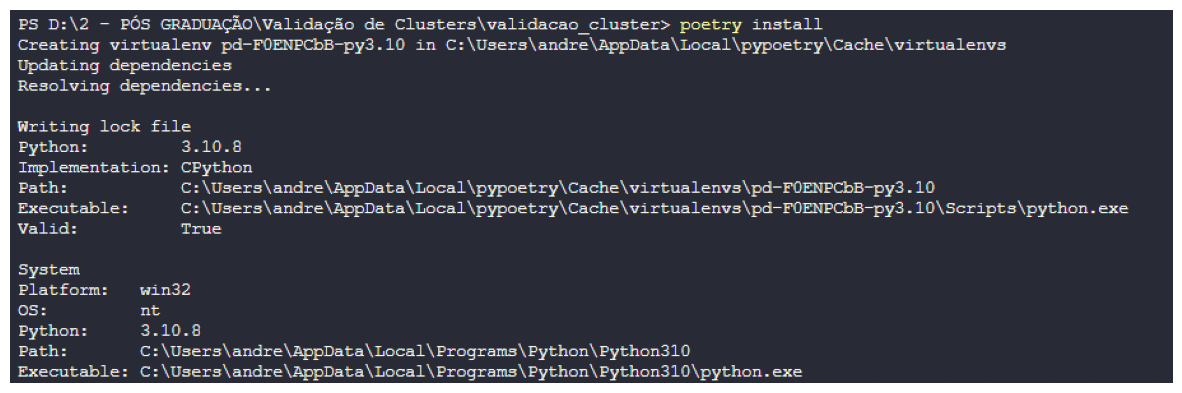

In [18]:
img = plt.imread('virtual_env.png', format='png')
fig, ax = plt.subplots(1,1,figsize=(15,5))
im = ax.imshow(img)
ax.axis('off')

### Disponibilize um GIT público

* O link para o repositório é: https://github.com/andre-lucena12/Validacao-de-Cluster

* O arquivo de requeriments.txt está incluido no GitHub e pode ser baixado atravé do link: https://github.com/andre-lucena12/Validacao-de-Cluster/blob/05cf6da5ce739ac9ec4c6e0952edcc98a18326b2/requirements.txt

# ESCOLHA DA BASE DE DADOS

In [2]:
df = pd.read_csv('Wine.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


### Escreva a justificativa

A base de dados foi retirada do Kaggle. É um dataset constituido por 13 propriedades de vinhos da mesma região, que passaram por análises químicas. O objetivo é separar em clusters, e direcionar os clientes com perfis parecidos que se encaixam com os indices de cada grupo encontrado. A coluna "Customer_Segment" é uma coluna de rótulos, que divide os vinhos em 3 grupos.

Separando os grupos com esses dados, o publico-alvo de cada tipo de vinho se torna fácil de identificar, desde que haja uma boa clusterização, permitindo que, não necessariamente alguém que entenda bem das propriedades de vinhos, possa trabalhar nesse mercado e prosperar.

### Mostre a faixa dinâmica dos dados

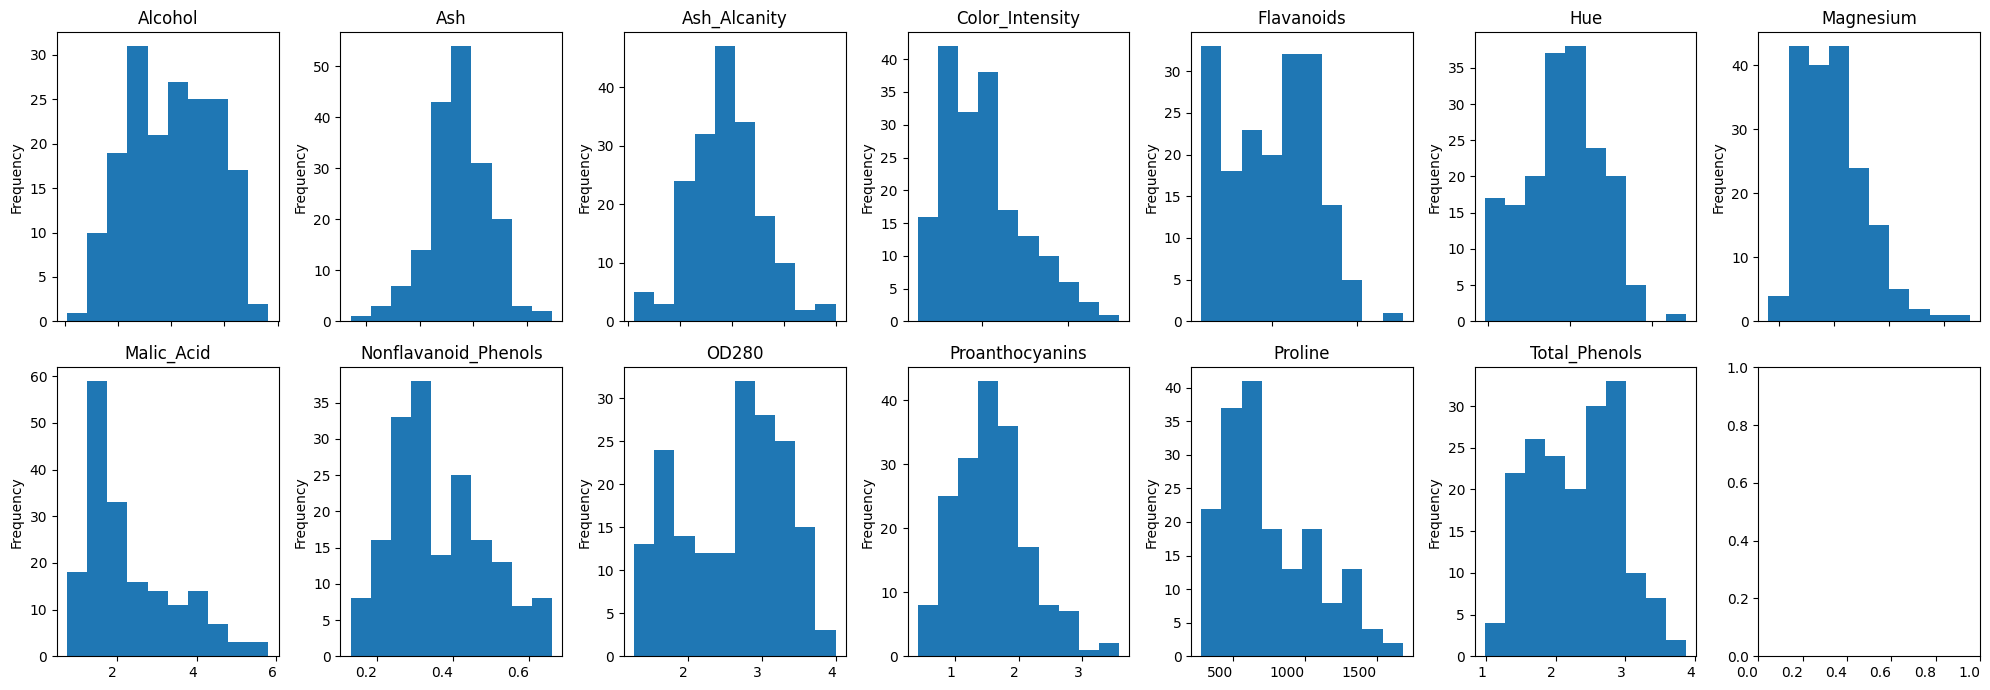

In [3]:
df_temp = df.drop(columns='Customer_Segment')

fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7),(ax8, ax9, ax10, ax11, ax12, ax13, ax14)) = plt.subplots(2,7,figsize=(20,7))

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13]
title_list = ['Alcohol', 'Ash', 'Ash_Alcanity', 'Color_Intensity', 'Flavanoids', 'Hue', 'Magnesium', 'Malic_Acid',
             'Nonflavanoid_Phenols', 'OD280', 'Proanthocyanins', 'Proline', 'Total_Phenols']

for i in range(0,13):

    df_temp[title_list[i]].plot(kind = 'hist', ax = ax_list[i])
    ax_list[i].set_title(title_list[i])

fig.autofmt_xdate(rotation=0)
plt.tight_layout()

### Realize o pré-processamento

In [4]:
df_normalized = ((df_temp - df_temp.mean())/df_temp.std())
df_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,-9.181170e-16,1.0,-2.427388,-0.786027,0.060828,0.833777,2.253415
Malic_Acid,178.0,0.000000e+00,1.0,-1.428952,-0.656896,-0.421922,0.667909,3.100446
Ash,178.0,-8.070947e-16,1.0,-3.668813,-0.570513,-0.023754,0.696145,3.147447
Ash_Alcanity,178.0,-7.983626e-17,1.0,-2.663505,-0.687199,0.001514,0.600395,3.145637
Magnesium,178.0,-1.995907e-17,1.0,-2.082381,-0.822096,-0.121938,0.508205,4.359076
Total_Phenols,178.0,3.991813e-17,1.0,-2.101318,-0.882977,0.095690,0.806722,2.532372
Flavanoids,178.0,-3.592632e-16,1.0,-1.691200,-0.825211,0.105851,0.846697,3.054216
Nonflavanoid_Phenols,178.0,3.592632e-16,1.0,-1.862979,-0.738059,-0.175599,0.607827,2.395645
Proanthocyanins,178.0,-1.596725e-16,1.0,-2.063214,-0.595603,-0.062721,0.627406,3.475269
Color_Intensity,178.0,1.995907e-17,1.0,-1.629691,-0.792866,-0.158777,0.492567,3.425768


# CLUSTERIZAÇÃO

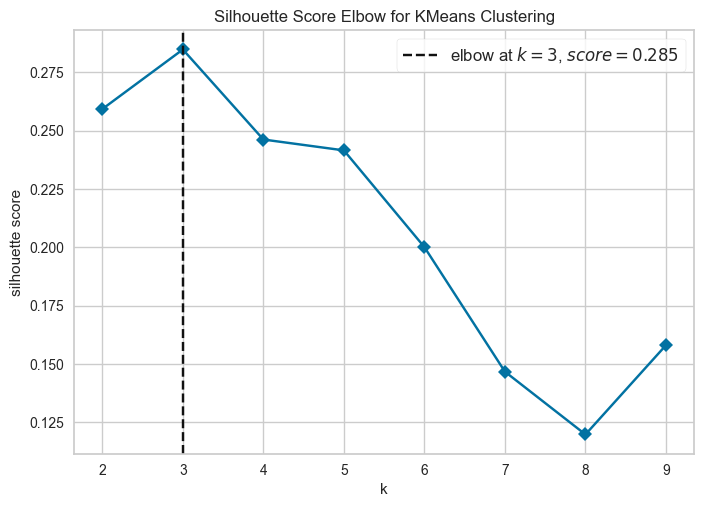

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [11]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(n_init=10)
visualizer = KElbowVisualizer(
    kmeans, k=(2,10), metric='silhouette', timings=False
)
visualizer.fit(df_normalized)        
visualizer.show()

Assim como no dataset existem 3 rotulos de grupos para os tipos de vinhos, a curva do indice de silhueta encontrou k=3

### K-MEANS

In [5]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=10)
k_fit = kmeans.fit(df_normalized)

clusters = k_fit.labels_
df_w_kmeans = df.copy()
df_w_kmeans['clusters'] = clusters

df_w_kmeans

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,2


c:\Users\andre\AppData\Local\pypoetry\Cache\virtualenvs\pd-F0ENPCbB-py3.10\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


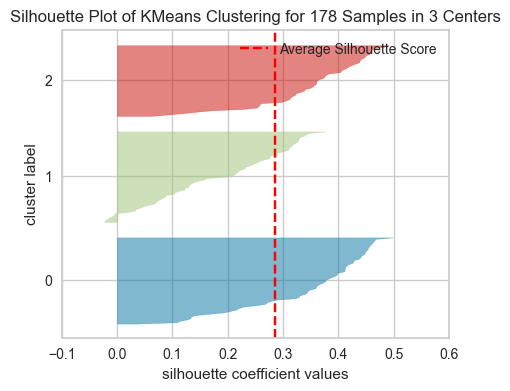

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 178 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [6]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

visualizer = SilhouetteVisualizer(k_fit, ax=ax, colors='yellowbrick')
visualizer.fit(df_normalized)
visualizer.show()

### Descreva o processo de mensuração do indice de silhueta

O indice de silhueta define um valor normalizado de -1 a 1 para cada um dos dados do dataset. Para definir o indice, ele calcula a distância do dado até o seu centroide e a distancia desse mesmo dado até o ponto mair próximo do cluster vizinho. Depois, divide a diferença das distâncias pela maior distância encontrada. Definida pela equação:

S = b-a/max(a,b)




### DBSCAN

In [28]:
db = DBSCAN(eps= 1.6, min_samples=5)
db_fit = db.fit(df_normalized)

dbscan_cluster = db_fit.labels_
df_w_dbscan = df.copy()
df_w_dbscan['clusters'] = dbscan_cluster

df_w_dbscan.groupby('clusters').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
clusters,,,,,,,,,,,,,,
-1,12.920247,2.346049,2.358827,19.608025,98.882716,2.268642,1.995123,0.363765,1.578272,4.865309,0.961457,2.60463,726.987654,1.969136
0,13.764000,1.834000,2.680000,18.220000,112.800000,2.920000,3.094000,0.346000,1.698000,6.480000,1.136000,2.77400,1273.000000,1.000000
1,13.951667,1.683333,2.281667,16.083333,117.833333,2.975000,3.135000,0.256667,2.086667,5.958333,0.975000,3.47500,942.500000,1.000000
2,13.700000,3.308000,2.404000,21.200000,92.800000,1.712000,0.744000,0.442000,1.298000,8.802000,0.628000,1.64200,631.000000,3.000000


### Compare os dois resultados

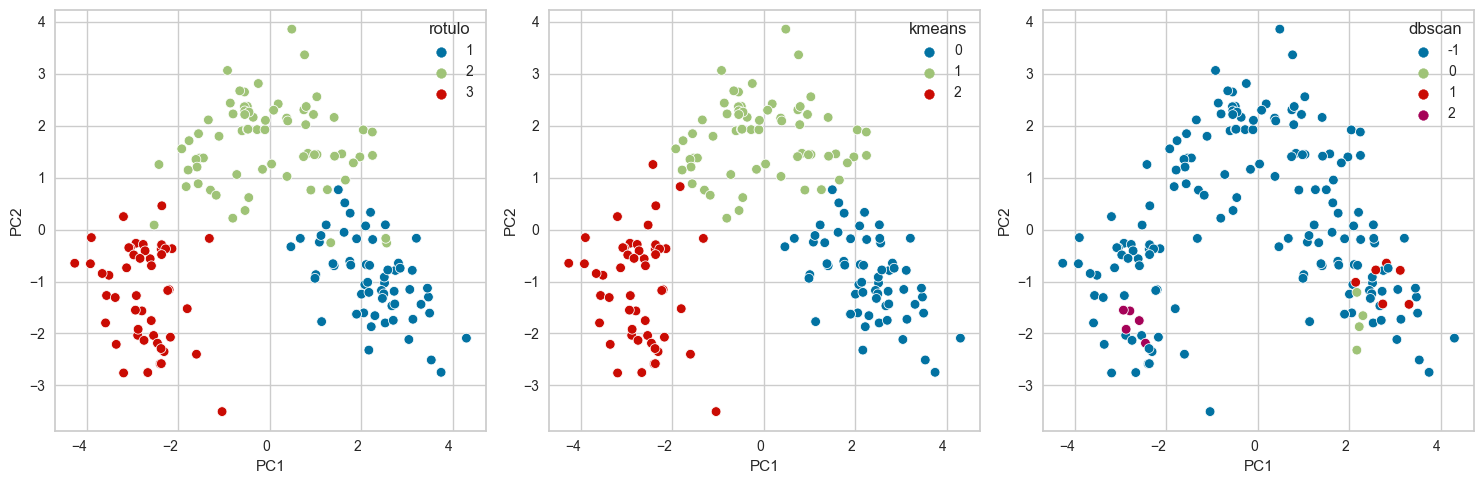

In [29]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca_data = pd.DataFrame(pca.fit_transform(df_normalized), columns=['PC1','PC2'])
pca_data['rotulo'] = pd.Categorical(df.Customer_Segment)
pca_data['kmeans'] = pd.Categorical(df_w_kmeans.clusters)
pca_data['dbscan'] = pd.Categorical(df_w_dbscan.clusters)

fig, (axs1, axs2, axs3) = plt.subplots(1,3, figsize=(15,5))

sns.scatterplot(x="PC1", y="PC2", hue='rotulo', data=pca_data, ax=axs1)
sns.scatterplot(x="PC1", y="PC2", hue='kmeans', data=pca_data, ax=axs2)
sns.scatterplot(x="PC1", y="PC2", hue='dbscan', data=pca_data, ax=axs3)

fig.autofmt_xdate(rotation=0)
plt.tight_layout()


Em relação ao rótulo da base de dados, o KMeans foi quem mais se aproximou do resultado real, com poucos pontos no limiar dos grupos com alguma diferença. Já o DBSCAN não obteve um bom resultado e considerou muito do dataset como ruído. Os poucos pontos que o DBSCAN encontrou como grupo refletem, minimamente, os grupos encontrados no KMeans.

### Escolha mais duas medidas de validação para comparar com o indice de silhueta.

c:\Users\andre\AppData\Local\pypoetry\Cache\virtualenvs\pd-F0ENPCbB-py3.10\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


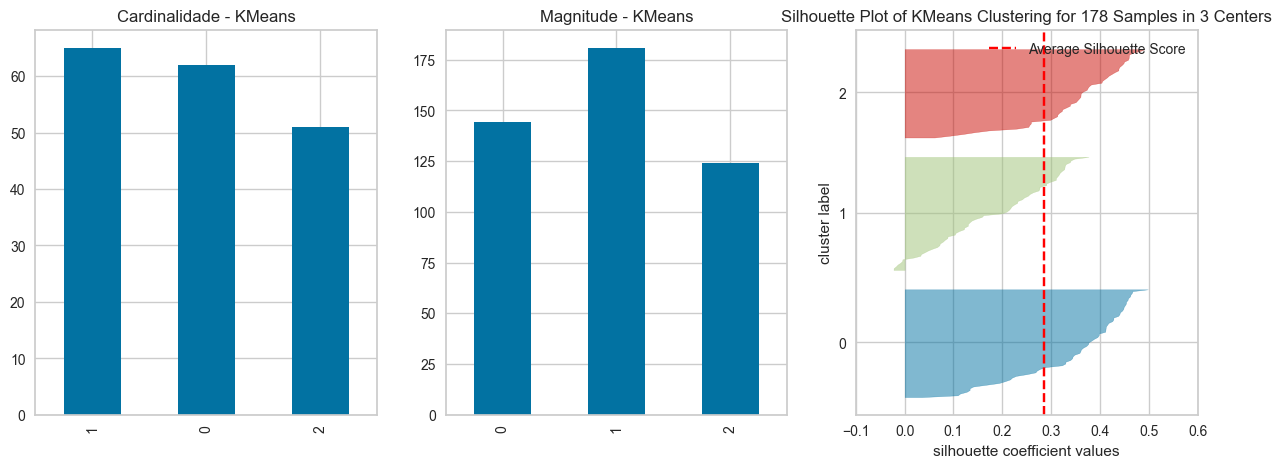

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 178 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
df_w_kmeans['distancia'] = pd.DataFrame(np.min(k_fit.transform(df_normalized), axis=1))

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

df_w_kmeans['clusters'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Cardinalidade - KMeans')

df_w_kmeans.groupby('clusters').sum()['distancia'].plot(kind='bar',ax=ax2)
ax2.set_title('Magnitude - KMeans')
ax2.set_xlabel('')

visualizer = SilhouetteVisualizer(k_fit, ax=ax3, colors='yellowbrick')
visualizer.fit(df_normalized)
visualizer.show()


Tendo em vista a cardinalidade, o cluster fica relativamente bem dividido entre os grupos, sendo que a diferença entre o grupo com mais amostras e o grupo com menos amostra é proximo de 10 pontos. A magnitude diz que o cluster 1 tem os dados mais espalhados, considerando que essa medida aponta a soma das distâncias dos dados até o seu centroide. O indice de silhueta, que ficou na média de 0.28, demonstra que os clusters são bem coesos, principalmente os clusters 0 e 2, que tem boa parte das observações acima da média do indice.

O indice DBCV da clusterização pelo algoritmo DBSCAN é: -0.6045449125830681


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

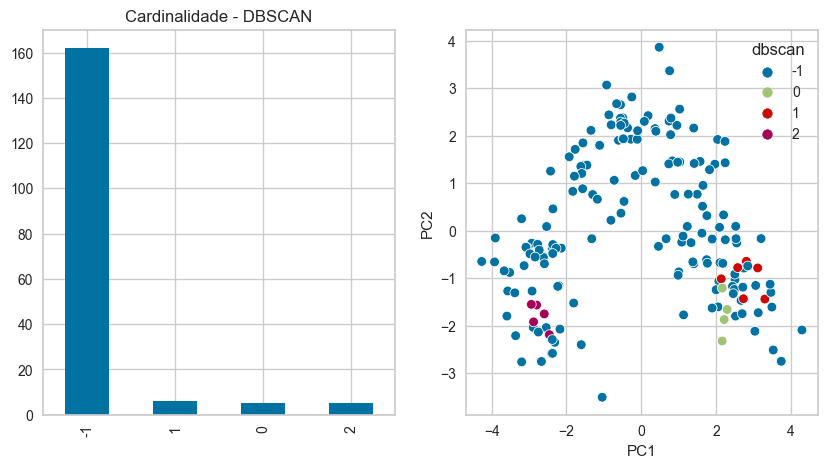

In [39]:
from DBCV import DBCV
from scipy.spatial.distance import euclidean

dbscan_score = DBCV(df_normalized.to_numpy(), db.fit_predict(df_normalized.to_numpy()), dist_function=euclidean)
print(f'O indice DBCV da clusterização pelo algoritmo DBSCAN é: {dbscan_score}')

fig, (ax, bx) = plt.subplots(1,2, figsize=(10,5))

df_w_dbscan['clusters'].value_counts().plot(kind='bar', ax=ax)
ax.set_title('Cardinalidade - DBSCAN')

sns.scatterplot(x="PC1", y="PC2", hue='dbscan', data=pca_data, ax=bx)


O indice DBCV, que ajuda a medir a densidade intra-cluster e entre cluster, ficou na média de -0.6, o que significa que os clusteres não tiveram um bom desempenho. O plot de cardinalidade ajuda a entender essa questão, demonstrando que boa parte dos dados foram considerados ruído, enquanto somente uma pequena parcela foi agrupada em 3 clusteres distintos. Isso pode ter acontecido por conta da baixa densidade de dados, que fica demonstrada no plot de magnitude do Kmeans, onde, mesmo sendo clusteres agrupados de forma consideravelmente boa, os dados estão esparsos.

### A silhueta é um indice indicado para escolher o número de clusters no DBSCAN ?

O indice de silhueta não é um bom indicativo de qualidade do algoritmo DBSCAN. Uma das caracteristicas do indice de silhueta é que ele tende a gerar resultados ruins para clusters baseados em densidade dos dados, como é o caso do DBSCAN. Essa medida de qualidade é mais indicada para clusters convexos, nesse tipo de cenário ela tende a gerar resultados maiores.

# MEDIDAS DE SIMILARIDADE

### Descreva em tópicos os passos necessários para clusterizar uma série temporal em 3 grupos baseado em correlaçao cruzada.

* Seguindo o Fluxo, o ideal é que antes de aplicar a correlação cruzada e clusterizar, devemos nos certificar de que as séries temporais tem o mesmo número de pontos caso use Pearson para medir correlação, porque o indice correlacional de Pearson depende disso para funcionar.

* Para realizar a correlação cruzada, devemos separa as amostras em intervalos de tempo de acordo com a medida temporal do dataset. Com essa separação, calculamos a correlação cruzada entre as séries temporais, intervalo por intervalo.

* Depois, clusterizamos o dataset nos 3 grupos utilizando a matriz de correlação cruzada resultante do passo anterior.

* Por fim, realizamos as medidas de validação para demonstrar a qualidade dos grupos encontrados.



### Para o problema anterior, indique qual algoritmo de clusterização você usaria e porque.

O algoritmo de clusterização hierarquica seria uma boa escolha, tendo em vista que o algortimo funcionária com um dataset comum, mesmo que por séries temporais, e com uma matriz de distância, que é o que calculamos com a correlação.

### Indique um caso de uso para a solução projetada

Podemos utilizar para verificar a tendência de ações de empresas no mercado, para separar regiões por clima de acordo com a sazonalidade e a temperatura durante um periodo, etc

### Sugira outra estratégia para medir similaridade em séries temporais. Descreva em tópicos os passos necessários.

Podemos usar DTW para medir similaridade entre séries temporais. Ele calcula uma matriz de distância e defini um caminho de custo minimo entre as séries temporais. Quando o caminho de menor custo é exatamente a diagonal da matriz de distância, significa que as séries temporais são exatamente correlatas. Se o caminho tende mais para o eixo x ou y, significa que o eixo para qual o caminho tendeu representa a série temporal lider e a outra a série seguidora.